In [ ]:
import os
import re
import ast
import pandas as pd

In [ ]:
def accuracy(d):
    equal_count = sum(1 for k, v in d.items() if k == v)
    total_count = len(d)
    return (equal_count / total_count) * 100

In [ ]:
def load_data():
    if os.path.exists("results.txt"):
        with open("results.txt","r") as file:
            data = file.readlines()[1:]
            for i in range(len(data)):
                data[i] = re.split(r'\t+', data[i])
                data[i][-1] = ast.literal_eval(data[i][-1].removesuffix("\n"))
        return data

In [ ]:
data = load_data()
#print(data)
#for line in data:
#    print(accuracy(line[-1]))

In [ ]:
preds = []
real = []

for line in data:
    dictionary = line[-1]
    for key in dictionary:
        real.append(key)
        preds.append(dictionary[key])
        

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(np.array(real),np.array(preds))



In [26]:
data

[['white',
  '0.00',
  'gzip',
  'None',
  '10',
  {'AnotherBrickInTheWall(Part3)': 'AnotherBrickInTheWall(Part3)',
   'DontLeaveMeNow': 'GoodbyeCruelWorld',
   'Vera': 'Vera',
   'IsThereAnybodyOutThere': 'IsThereAnybodyOutThere',
   'BringTheBoysBackHome': 'TheHappiestDaysOfOurLives',
   'TheTrial': 'TheTrial',
   'AnotherBrickInTheWall(Part1)': 'GoodbyeCruelWorld',
   'OneOfMyTurns': 'GoodbyeCruelWorld',
   'GoodbyeCruelWorld': 'GoodbyeCruelWorld',
   'YoungLust': 'YoungLust',
   'TheHappiestDaysOfOurLives': 'TheHappiestDaysOfOurLives',
   'EmptySpaces': 'EmptySpaces',
   'ComfortablyNumb': 'GoodbyeCruelWorld',
   'TheThinIce': 'TheThinIce',
   'WaitingForTheWorms': 'TheShowMustGoOn',
   'OutsideTheWall': 'OutsideTheWall',
   'GoodbyeBlueSky': 'GoodbyeBlueSky',
   'Mother': 'GoodbyeCruelWorld',
   'NobodyHome': 'NobodyHome',
   'AnotherBrickInTheWall(Part2)': 'GoodbyeCruelWorld',
   'RunLikeHell': 'RunLikeHell',
   'TheShowMustGoOn': 'TheShowMustGoOn',
   'InTheFlesh': 'InTheFlesh',

In [54]:
data_df = pd.DataFrame()

for line in data:
    values = line[:-1]
    values.append(accuracy(line[-1]))
    data_df = pd.concat([data_df,pd.DataFrame(values).T])

In [56]:
data_df.columns =  ["type of noise","noise percentage","compressor","compression level","segment length","accuracy"]
data_df

,type of noise,noise percentage,compressor,compression level,segment length,accuracy
0,white,0.00,gzip,None,10,60.0
0,white,0.00,gzip,2,10,4.0
0,white,0.00,gzip,5,10,36.0
0,white,0.00,gzip,9,10,60.0
0,white,0.00,gzip,None,30,92.0
...,...,...,...,...,...,...
0,brown,0.80,zstd,9,30,68.0
0,brown,0.80,zstd,None,60,96.0
0,brown,0.80,zstd,2,60,96.0
0,brown,0.80,zstd,5,60,92.0


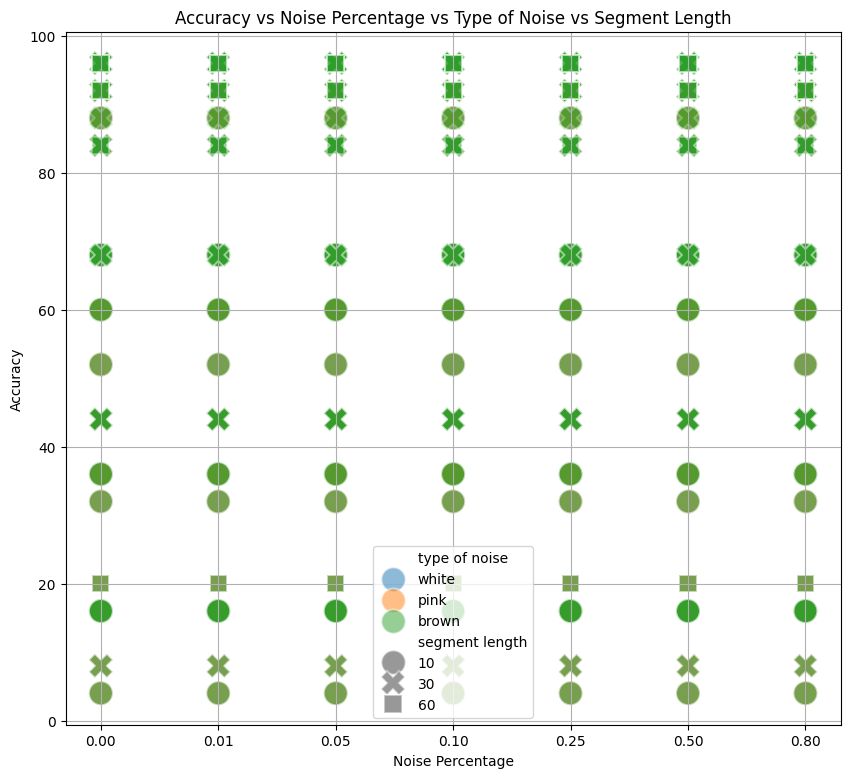

In [116]:
# Plotting each combination of parameters using scatter plot
plt.figure(figsize=(10, 9))
sns.scatterplot(data=data_df, x="noise percentage", y="accuracy", hue="type of noise", style="segment length",s=300, alpha=0.5)
plt.title("Accuracy vs Noise Percentage vs Type of Noise vs Segment Length")
plt.xlabel("Noise Percentage")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/first.png")
plt.show()

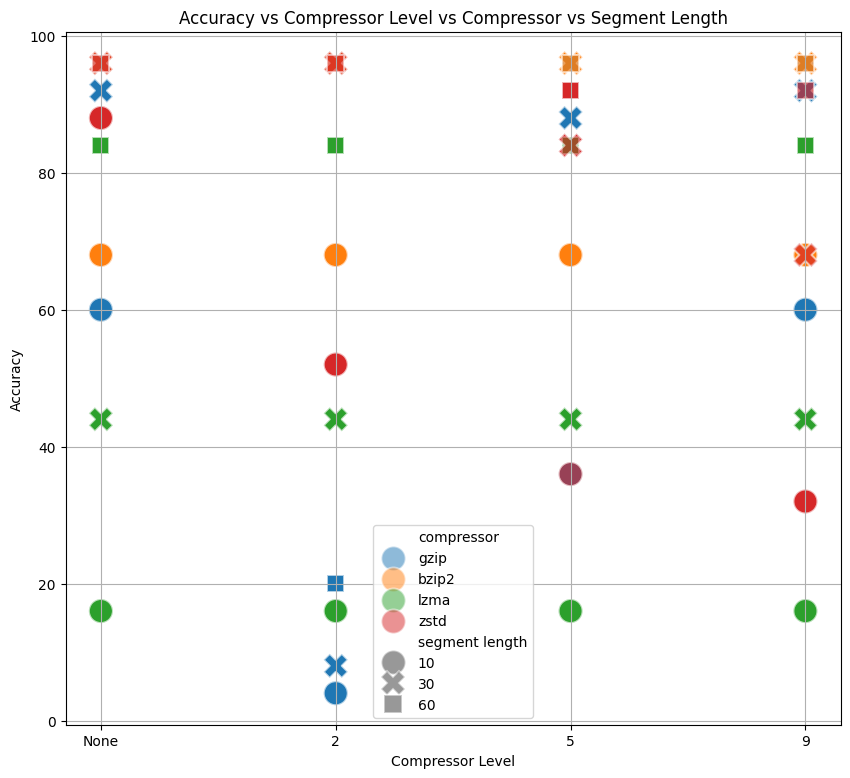

In [117]:

# Plotting each combination of parameters using scatter plot
plt.figure(figsize=(10, 9))
sns.scatterplot(data=data_df, x="compression level", y="accuracy", hue="compressor", style="segment length",s=300, alpha=0.5)
plt.title("Accuracy vs Compressor Level vs Compressor vs Segment Length")
plt.xlabel("Compressor Level")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/second.png")
plt.show()

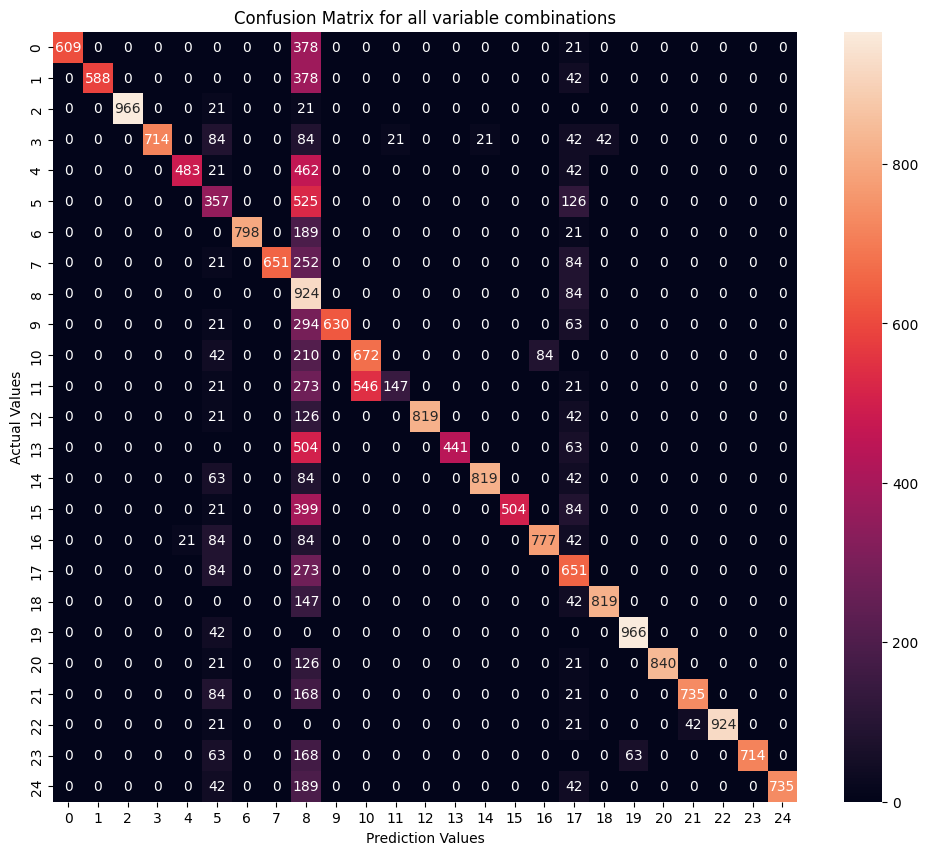

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(cm,annot=True,fmt=".0f")  # Add annotations (numbers) to the heatmap cells
plt.title("Confusion Matrix for all variable combinations")
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
fig_name = "All"
plt.savefig("../graphs/"+fig_name)
plt.show()
